## Faster R-CNN
Faster R-CNNの実装を動かします。
https://arxiv.org/pdf/1506.01497.pdf


以下のものを使用してください。Kerasを使用した実装です。

https://github.com/duckrabbits/ObjectDetection/tree/master

### 【問題1】学習と推定
READMEを参考に上記実装を動かしてください。

In [1]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 57kB/s 
     |████████████████████████████████| 51kB 2.9MB/s 
     |████████████████████████████████| 491kB 44.2MB/s 
     |████████████████████████████████| 3.2MB 38.0MB/s 
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.0
    Uninstalling tensorboard-2.4.0:
      Successfully uninstalled tensorboard-2.4.0
  Found existing installation: tensorflow 2.4.0
    Uninstalling tensorflow-2.4.0:
      Successfully uninstalled tensorflow-2.4.0


In [2]:
import tensorflow

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [3]:
tensorflow.__version__

'1.14.0'

In [4]:
!pip install keras==2.2.4

     |████████████████████████████████| 317kB 6.3MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [5]:
import keras

Using TensorFlow backend.


In [6]:
keras.__version__

'2.2.4'

In [7]:
!pip install kaggle

In [32]:
# 自分のマイドライブにマウントする

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
mkdir .kaggle

In [11]:
ls -a

./  ../  .config/  drive/  .kaggle/  sample_data/


In [ ]:
#cd drive/"My Drive"

In [12]:
# https://www.kaggle.com/　へアクセスし、ログイン後に右上のプロフィール画像をクリック、さらに"My Account"をクリックする
# このサイトの「API」項目にある"Create New API Token"をクリックすると、kaggle.jsonファイルが自動的にダウンロードされる
# ローカルで、kaggle.json（ダウンロードフォルダにあるはず）をエディターで開く。
# このセルの以下のコードにある token = {'username':'***','key':'***'} における「***」部分を、
# ダウンロードしたkaggle.jsonを参照して書き換え、このセルを実行する

import json

token = {"username":"shotakamijo","key":"4bcc17b65ed5c832b7955ebf8361977a"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [13]:
!chmod 600 /content/.kaggle/kaggle.json

In [14]:
pwd

'/content'

In [15]:
ls -a .kaggle

./  ../  kaggle.json


In [16]:
mkdir　/root/.kaggle/

In [17]:
!cp -R /content/.kaggle/kaggle.json /root/.kaggle/

In [18]:
!ls -a /root/.kaggle/

.  ..  kaggle.json


In [19]:
# kaggle APIコマンドが使えるかどうかを確認


!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        105           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        214           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        416           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2846           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      21961           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       5815            True  
connectx

In [20]:
# カレントディレクトリの変更

import os

os.chdir('/content/drive/My Drive/')

# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive


In [21]:
# simpsonデータセットのAPIコマンドでデータセットをダウンロードする
# APIコマンドはこちらのサイトを参照。https://www.kaggle.com/alexattia/the-simpsons-characters-dataset

!kaggle datasets download -d alexattia/the-simpsons-characters-dataset --force

100% 1.08G/1.08G [00:24<00:00, 108MB/s]
100% 1.08G/1.08G [00:24<00:00, 47.2MB/s]


In [22]:

!unzip /content/drive/'MyDrive'/the-simpsons-characters-dataset.zip  -d Simpsons

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1269.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1270.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset

In [23]:
# リポジトリをクローンする
!git clone https://github.com/duckrabbits/ObjectDetection.git

fatal: destination path 'ObjectDetection' already exists and is not an empty directory.


In [ ]:
# https://github.com/duckrabbits/ObjectDetection/tree/master
# この後、上述のgithubのreadmeに沿って、simpsons_datasetフォルダをプロジェクトフォルダ配下に格納しましょう。
# testデータなども同様に準備してみよう。

In [24]:
# ファイルやディレクトリを移動
!mv Simpsons/simpsons_dataset ObjectDetection

In [25]:
# annotationファイルはkaggleのではなく、gitにあるファイルをコピーして使う。
#!cp -a /content/drive/MyDrive/Simpsons/annotation.txt /content/drive/MyDrive/ObjectDetection/annotation.txt

In [25]:
# テスト用の写真が入ったフォルダを作業用フォルダへ移動。
#!cp -r /content/drive/MyDrive/Simpsons/kaggle_simpson_testset/kaggle_simpson_testset ObjectDetection

^C


In [26]:
# カレントディレクトリの変更

import os

os.chdir('/content/drive/MyDrive/ObjectDetection')

# カレントディレクトリの取得
print(os.getcwd())

/content/drive/MyDrive/ObjectDetection


In [27]:
ls

annotation.txt           model/      README.md  simpsons_dataset/
kaggle_simpson_testset/  predict.py  save/      train.py


In [29]:
!python /content/drive/MyDrive/ObjectDetection/train.py -p annotation.txt

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [35]:
! python predict.py -i /content/drive/MyDrive/ObjectDetection/kaggle_simpson_testset -c ./save/train_20210119-014934_config.pickle

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

エポックが10回くらいでは結果が出てこない。。

### 【問題2】コードリーディング

上記実装のコードリーディングを行ってください。


まず、Faster R-CNNにおいて重要だと考えた部分を列挙してください。そして、それに対応するコードを見つけてください。

フレームワークには畳み込み層など一般的なものはクラスが用意されていますが、RoIプーリングなど特定の手法限定のものは用意されていません。オリジナルのレイヤーを作成することが可能であり、Kerasであれば以下のページに情報がまとまっています。


https://keras.io/ja/layers/writing-your-own-keras-layers/

KerasではVGG16のクラスが用意されているため、簡単に利用ができます。include_top=Falseの引数を与えることで、出力のための全結合層部分が除かれます。weights='imagenet'でImageNetを利用した学習済みモデルも手に入り、転移学習 が行えます。weights='None'とすればランダムな初期化となります。

https://keras.io/ja/applications/#vgg16

## YOLOv3

シンプソンズのデータセットをFaster R-CNN以外の手法で学習・推定を行います。YOLOv3[2]のKeras実装を使います。

https://github.com/qqwweee/keras-yolo3

〈参考文献URL〉

Jeseph Redmon, Ali Farhadi. YOLOv3: An Incremental Improvement

https://pjreddie.com/media/files/papers/YOLOv3.pdf

### 【問題3】学習済みの重みによる推定

学習済みの重みを使い推定を行う方法がREADME.mdのQuick Startの項に記載されています。


まずはこの通りにして各自何かしらの画像や動画に対して検出を行ってください。


出力結果を課題の一部として提出してください。

#### YOLOv3をインストールする

In [36]:
!git clone https://github.com/pjreddie/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5931, done.
remote: Total 5931 (delta 0), reused 0 (delta 0), pack-reused 5931
Receiving objects: 100% (5931/5931), 6.34 MiB | 3.77 MiB/s, done.
Resolving deltas: 100% (3922/3922), done.
Checking out files: 100% (979/979), done.


In [38]:
cd darknet

/content/drive/My Drive/ObjectDetection/darknet


In [40]:
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

In [42]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-01-19 04:58:10--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  4.19MB/s    in 4m 42s  

2021-01-19 05:02:53 (858 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [45]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

#### DarknetYOLOモデルをKerasモデルに変換

In [52]:
#Kerasに変換
!git clone https://github.com/qqwweee/keras-yolo3 

Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 151.08 KiB | 1.82 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [47]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-01-19 05:25:13--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M   634KB/s    in 8m 23s  

2021-01-19 05:33:36 (481 KB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



In [54]:
pwd

'/content/drive/My Drive/darknet/src'

In [58]:
cd /content/drive/MyDrive/keras-yolo3

/content/drive/MyDrive/keras-yolo3


Kerasに書き換えるようにダウンロードしてきた重みが‘yolov3.weights.1’としてダウンロードされてきているので、keras-yolo3フォルダの直下に配置。


その後、! python yolo_video.py --image実行前に削除するものがある。修正するものがある。


yoro_video.py を修正　→ r_image.show()の下の行に次の行を挿入 r_image.save('output.jpg') -> 実行後はoutput.jpgを確認する。


実行すると何度もinput-imgを求められる。。終了方法が分からない。→プログラムは自分で終了させる。input_imageを入れるとoutput.jpgが生成されるのでそれで終了

In [61]:
!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [63]:
!python yolo_video.py --image

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

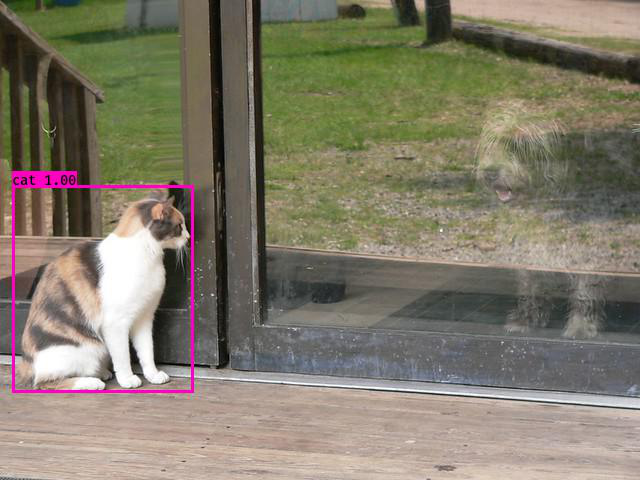

In [71]:
from PIL import Image

#jpgデータを読み込みます
img = Image.open('/content/drive/MyDrive/keras-yolo3/output.jpg')
img

### 【問題4】学習のためのファイルを作成

新しいデータ（シンプソンズデータセット）を学習します。README.mdのTrainingの項を読み、シンプソンズデータセットを学習するために必要なファイルを作成してください。


アノテーションファイルの形式が問題1の実装とは異なるため変換する必要があります。

**以下の通り作成**

シンプソンズのannotation.txtの記載形式は以下の通り。
simpsons_dataset/abraham_grampa_simpson/pic_0000.jpg57,72,52,72,abraham_grampa_simpson


simpsons_dataset/abraham_grampa_simpson/pic_0001.jpg,80,31,337,354,abraham_grampa_simpson


simpsons_dataset/abraham_grampa_simpson/pic_0002.jpg,128,48,285,407,abraham_grampa_simpson
 

**クラスファイルとアンカーファイルを作成して以下の形式に変更すること求められる。**


path/to/img1.jpg 50,100,150,200,0 30,50,200,120,3


path/to/img2.jpg 120,300,250,600,2


  (実行時に指定する。
—classes class_file
--anchors anchor_file)

 

**以下のファイルを作成。**


- “simpsons_classes.txt”


- “simpsons_annotation.txt”
 

**“simpsons_classes.txt”**


abraham_grampa_simpson

agnes_skinner

apu_nahasapeemapetilon

barney_gumble

bart_simpson

carl_carlson

charles_montgomery_burns

chief_wiggum

cletus_spuckler

comic_book_guy

disco_stu

edna_krabappel

fat_tony

gil

groundskeeper_willie

homer_simpson

kent_brockman

krusty_the_clown

lenny_leonard

lionel_hutz

lisa_simpson

maggie_simpson

marge_simpson

martin_prince

mayor_quimby

milhouse_van_houten

miss_hoover

moe_szyslak

ned_flanders

nelson_muntz

otto_mann

patty_bouvier

principal_skinner

professor_john_frink

rainier_wolfcastle

ralph_wiggum

selma_bouvier

sideshow_bob

sideshow_mel

simpsons_dataset

snake_jailbird

troy_mcclure

waylon_smithers


**“simpsons_annotation.txt”**


/content/drive/MyDrive/ObjectDetection/simpsons_dataset/abraham_grampa_simpson/pic_0000.jpg 57,72,52,72,0


/content/drive/MyDrive/ObjectDetection/simpsons_dataset/abraham_grampa_simpson/pic_0001.jpg 80,31,337,354,0


/content/drive/MyDrive/ObjectDetection/simpsons_dataset/abraham_grampa_simpson/pic_0002.jpg 128,48,285,407,0


/content/drive/MyDrive/ObjectDetection/simpsons_dataset/abraham_grampa_simpson/pic_0003.jpg 72,126,158,275,0


/content/drive/MyDrive/ObjectDetection/simpsons_dataset/abraham_grampa_simpson/pic_0004.jpg 123,61,294,416,0

 

**実行時に指定**


—classes class_file　--anchors anchor_file

↑コードの書き換えで対応　　


**train.pyの書き換え**

def _main():

 　annotation_path = **'train.txt'**

 　log_dir = 'logs/000/'

 　classes_path = **'model_data/voc_classes.txt'**

 　anchors_path = 'model_data/yolo_anchors.txt'

 　class_names = get_classes(classes_path)

 　num_classes = len(class_names)

 　anchors = get_anchors(anchors_path)


def _main():

 　annotation_path = **'model_data/simpsons_annotation.txt'**

 　log_dir = 'logs/000/'

 　classes_path = **'model_data/simpsons_classes.txt'**

 　anchors_path = 'model_data/yolo_anchors.txt'

 　class_names = get_classes(classes_path)

 　num_classes = len(class_names)

 　anchors = get_anchors(anchors_path)

### 【問題5】学習が行えることの確認

問題4で作成したファイルを使用して学習してください。実行環境で学習に時間がかかる場合は、学習が行えることを確認するのみで終えて構いません。

In [74]:
! python convert.py -w yolov3.cfg yolov3.weights model_data/yolo_weights.h5

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [77]:
!python train.py

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

学習が行えているようなので、とりあえずOK。

### 【問題6】（アドバンス課題）コードリーディング

上記実装のコードリーディングを行ってください。


まず、YOLOv3[2]の論文において重要だと考えた部分を列挙してください。そして、それに対応するコードを見つけてください。